# Prepare Environment

***Import libraries required***

In [ ]:
# install cudatoolkit as it is missing from the standard Saturn tensorflow environment
!conda install -n saturn cudatoolkit=11.8 -y

In [2]:
# import libraries for file utilities
import os
import zipfile

In [3]:
# import standard ml libraries 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# tensorflow/core/util/util.cc:169] oneDNN custom operations are on by default
# May result in slightly different numerical results due to floating-point round-off errors from different computation orders. 
# Setting the environment variable TF_ENABLE_ONEDNN_OPTS=0 to turn them off.
# os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

In [5]:
import tensorflow as tf
from tensorflow import keras

2024-01-20 20:38:43.774625: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [6]:
# library to load images
from tensorflow.keras.preprocessing.image import load_img

In [7]:
# library to import Xception CNN
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

## Import

In [33]:
# copy data zip file to /data folder and unzip it 
zip_path = './data/catbreeds_data.zip'
extract_path = './data/'
# Check if the folder already exists
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
        print("Data files extracted successfully from zip file.")
else:
    print("Folder already exists. Skipping data extraction.")

Folder already exists. Skipping data extraction.


## Explore

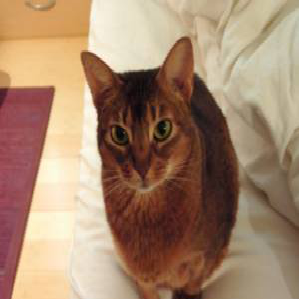

In [34]:
# check that an image can be loaded
path = './data/train/Abyssinian'
name = 'Abyssinian_10.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299, 299))
img

In [35]:
x = np.array(img)
x.shape

(299, 299, 3)

# Build Model

## Baseline

***Use Xception model as baseline***

In [36]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [37]:
X = np.array([x])

In [38]:
X.shape

(1, 299, 299, 3)

In [39]:
X = preprocess_input(X)
X[0]

array([[[ 0.62352943,  0.21568632, -0.25490195],
        [ 0.62352943,  0.21568632, -0.25490195],
        [ 0.6313726 ,  0.22352946, -0.24705881],
        ...,
        [ 0.33333337,  0.24705887, -0.00392157],
        [ 0.32549024,  0.23921573, -0.01176471],
        [ 0.32549024,  0.23921573, -0.01176471]],

       [[ 0.62352943,  0.21568632, -0.25490195],
        [ 0.62352943,  0.21568632, -0.25490195],
        [ 0.6313726 ,  0.22352946, -0.24705881],
        ...,
        [ 0.34901965,  0.26274514,  0.01176476],
        [ 0.3411765 ,  0.254902  ,  0.00392163],
        [ 0.33333337,  0.26274514,  0.0196079 ]],

       [[ 0.62352943,  0.21568632, -0.25490195],
        [ 0.62352943,  0.21568632, -0.25490195],
        [ 0.6313726 ,  0.22352946, -0.24705881],
        ...,
        [ 0.34901965,  0.26274514,  0.01176476],
        [ 0.3411765 ,  0.254902  ,  0.00392163],
        [ 0.33333337,  0.26274514,  0.0196079 ]],

       ...,

       [[ 0.14509809, -0.44313723, -0.27843136],
        [ 0

In [40]:
pred = model.predict(X)

1/1 [==============================] - 1s 613ms/step


In [41]:
pred.shape

(1, 1000)

In [42]:
decode_predictions(pred)

[[('n02124075', 'Egyptian_cat', 0.50023896),
  ('n02123045', 'tabby', 0.3022023),
  ('n02123159', 'tiger_cat', 0.07821819),
  ('n03958227', 'plastic_bag', 0.0064762505),
  ('n02123597', 'Siamese_cat', 0.004068526)]]

***Load images and train models***

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [44]:
# run model using train data
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds = train_gen.flow_from_directory(
    './data/train/',
    target_size=(150, 150),
    batch_size=32
)

Found 4200 images belonging to 20 classes.


In [45]:
# display classes
train_ds.class_indices

{'Abyssinian': 0,
 'American Bobtail': 1,
 'American Curl': 2,
 'American Shorthair': 3,
 'Bengal': 4,
 'Birman': 5,
 'Bombay': 6,
 'British Shorthair': 7,
 'Egyptian Mau': 8,
 'Exotic Shorthair': 9,
 'Maine Coon': 10,
 'Manx': 11,
 'Norwegian Forest': 12,
 'Persian': 13,
 'Ragdoll': 14,
 'Russian Blue': 15,
 'Scottish Fold': 16,
 'Siamese': 17,
 'Sphynx': 18,
 'Turkish Angora': 19}

In [46]:
# run model using validation data
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './data/validation/',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 1400 images belonging to 20 classes.


In [47]:
train_ds.class_indices

{'Abyssinian': 0,
 'American Bobtail': 1,
 'American Curl': 2,
 'American Shorthair': 3,
 'Bengal': 4,
 'Birman': 5,
 'Bombay': 6,
 'British Shorthair': 7,
 'Egyptian Mau': 8,
 'Exotic Shorthair': 9,
 'Maine Coon': 10,
 'Manx': 11,
 'Norwegian Forest': 12,
 'Persian': 13,
 'Ragdoll': 14,
 'Russian Blue': 15,
 'Scottish Fold': 16,
 'Siamese': 17,
 'Sphynx': 18,
 'Turkish Angora': 19}

***Create base model***

In [48]:
# create convolutional layers
base_model = Xception(weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

# set trainable to flase as we want to use existing model
base_model.trainable = False

# define model layers
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D() (base)

outputs = keras.layers.Dense(20) (vectors)

model = keras.Model(inputs, outputs)

In [49]:
# Set-up X (cat whose breeds needs to be identified)
path = './data/train/Abyssinian'
name = 'Abyssinian_10.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(150, 150))
x = np.array(img)
X = np.array([x])
X.shape

(1, 150, 150, 3)

In [50]:
preds = model.predict(X)

1/1 [==============================] - 1s 985ms/step


In [51]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [52]:
base_history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
132/132 [==============================] - 43s 304ms/step - loss: 2.9137 - accuracy: 0.4381 - val_loss: 2.4583 - val_accuracy: 0.4921
Epoch 2/10
132/132 [==============================] - 34s 261ms/step - loss: 1.5338 - accuracy: 0.6333 - val_loss: 2.7756 - val_accuracy: 0.5171
Epoch 3/10
132/132 [==============================] - 34s 260ms/step - loss: 1.2310 - accuracy: 0.6888 - val_loss: 2.7662 - val_accuracy: 0.5150
Epoch 4/10
132/132 [==============================] - 34s 260ms/step - loss: 0.9343 - accuracy: 0.7498 - val_loss: 2.5575 - val_accuracy: 0.5521
Epoch 5/10
132/132 [==============================] - 34s 260ms/step - loss: 0.7547 - accuracy: 0.7829 - val_loss: 2.9432 - val_accuracy: 0.5286
Epoch 6/10
132/132 [==============================] - 34s 259ms/step - loss: 0.6181 - accuracy: 0.8162 - val_loss: 2.7719 - val_accuracy: 0.5507
Epoch 7/10
132/132 [==============================] - 34s 259ms/step - loss: 0.4261 - accuracy: 0.8626 - val_loss: 3.2287 - val_ac

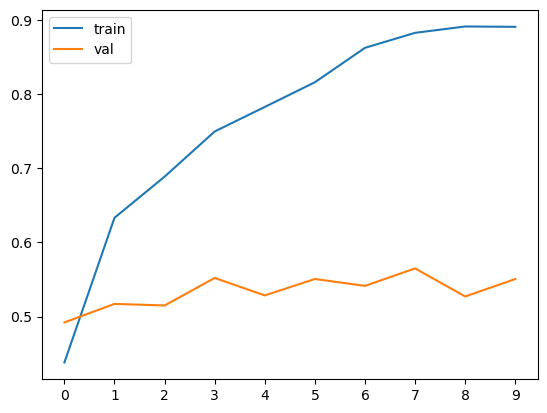

In [53]:
# plot training accuracy vs validation accuracy
plt.plot(base_history.history['accuracy'], label='train')
plt.plot(base_history.history['val_accuracy'], label='val')

plt.xticks(np.arange(10))
plt.legend()

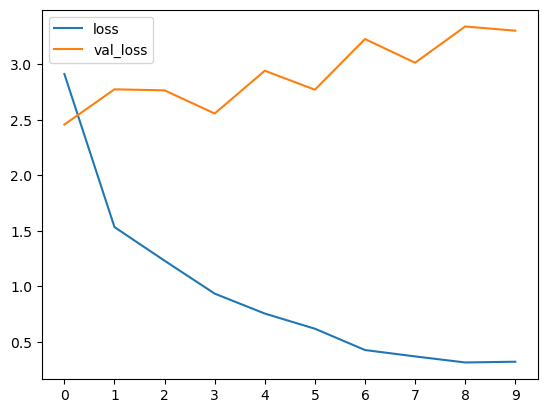

In [54]:
# plot training loss vs validation loss
plt.plot(base_history.history['loss'], label='loss')
plt.plot(base_history.history['val_loss'], label='val_loss')

plt.xticks(np.arange(10))
plt.legend()

## Iterate

***Iteration 1: Adjust the learning rate***

In [55]:
def make_model(learning_rate):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    # define model architecture
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(20)(vectors)
    model = keras.Model(inputs, outputs)
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [56]:
scores = {}
for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()
    

0.0001
Epoch 1/10
132/132 [==============================] - 37s 268ms/step - loss: 2.6688 - accuracy: 0.2052 - val_loss: 2.2401 - val_accuracy: 0.3457
Epoch 2/10
132/132 [==============================] - 34s 261ms/step - loss: 1.9911 - accuracy: 0.4245 - val_loss: 1.8616 - val_accuracy: 0.4450
Epoch 3/10
132/132 [==============================] - 34s 261ms/step - loss: 1.7015 - accuracy: 0.5014 - val_loss: 1.6909 - val_accuracy: 0.4829
Epoch 4/10
132/132 [==============================] - 35s 262ms/step - loss: 1.5403 - accuracy: 0.5383 - val_loss: 1.5858 - val_accuracy: 0.4986
Epoch 5/10
132/132 [==============================] - 34s 259ms/step - loss: 1.4353 - accuracy: 0.5667 - val_loss: 1.5166 - val_accuracy: 0.5264
Epoch 6/10
132/132 [==============================] - 34s 258ms/step - loss: 1.3580 - accuracy: 0.5869 - val_loss: 1.4714 - val_accuracy: 0.5343
Epoch 7/10
132/132 [==============================] - 34s 259ms/step - loss: 1.2947 - accuracy: 0.6140 - val_loss: 1.4349 -

In [56]:
scores = {}
for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()
    

0.0001
Epoch 1/10
132/132 [==============================] - 37s 268ms/step - loss: 2.6688 - accuracy: 0.2052 - val_loss: 2.2401 - val_accuracy: 0.3457
Epoch 2/10
132/132 [==============================] - 34s 261ms/step - loss: 1.9911 - accuracy: 0.4245 - val_loss: 1.8616 - val_accuracy: 0.4450
Epoch 3/10
132/132 [==============================] - 34s 261ms/step - loss: 1.7015 - accuracy: 0.5014 - val_loss: 1.6909 - val_accuracy: 0.4829
Epoch 4/10
132/132 [==============================] - 35s 262ms/step - loss: 1.5403 - accuracy: 0.5383 - val_loss: 1.5858 - val_accuracy: 0.4986
Epoch 5/10
132/132 [==============================] - 34s 259ms/step - loss: 1.4353 - accuracy: 0.5667 - val_loss: 1.5166 - val_accuracy: 0.5264
Epoch 6/10
132/132 [==============================] - 34s 258ms/step - loss: 1.3580 - accuracy: 0.5869 - val_loss: 1.4714 - val_accuracy: 0.5343
Epoch 7/10
132/132 [==============================] - 34s 259ms/step - loss: 1.2947 - accuracy: 0.6140 - val_loss: 1.4349 -

In [56]:
scores = {}
for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()
    

0.0001
Epoch 1/10
132/132 [==============================] - 37s 268ms/step - loss: 2.6688 - accuracy: 0.2052 - val_loss: 2.2401 - val_accuracy: 0.3457
Epoch 2/10
132/132 [==============================] - 34s 261ms/step - loss: 1.9911 - accuracy: 0.4245 - val_loss: 1.8616 - val_accuracy: 0.4450
Epoch 3/10
132/132 [==============================] - 34s 261ms/step - loss: 1.7015 - accuracy: 0.5014 - val_loss: 1.6909 - val_accuracy: 0.4829
Epoch 4/10
132/132 [==============================] - 35s 262ms/step - loss: 1.5403 - accuracy: 0.5383 - val_loss: 1.5858 - val_accuracy: 0.4986
Epoch 5/10
132/132 [==============================] - 34s 259ms/step - loss: 1.4353 - accuracy: 0.5667 - val_loss: 1.5166 - val_accuracy: 0.5264
Epoch 6/10
132/132 [==============================] - 34s 258ms/step - loss: 1.3580 - accuracy: 0.5869 - val_loss: 1.4714 - val_accuracy: 0.5343
Epoch 7/10
132/132 [==============================] - 34s 259ms/step - loss: 1.2947 - accuracy: 0.6140 - val_loss: 1.4349 -

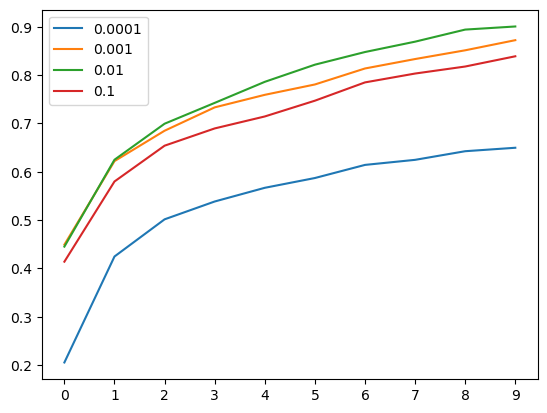

In [57]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=lr)
    
plt.xticks(np.arange(10))
plt.legend()

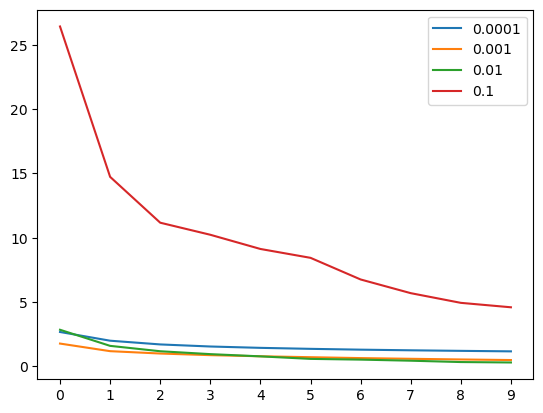

In [58]:
# plot training loss 
for lr, hist in scores.items():
    plt.plot(hist['loss'], label=lr)

plt.xticks(np.arange(10))
plt.legend()

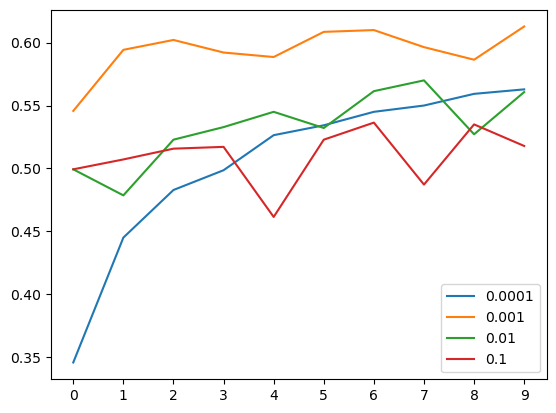

In [59]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=lr)
    
plt.xticks(np.arange(10))
plt.legend()

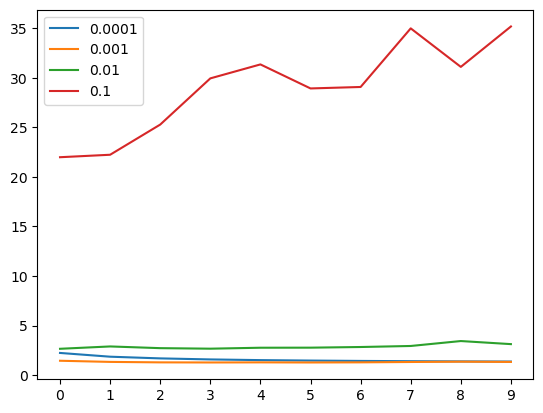

In [60]:
# plot training loss 
for lr, hist in scores.items():
    plt.plot(hist['val_loss'], label=lr)

plt.xticks(np.arange(10))
plt.legend()

In [61]:
learning_rate = 0.001
print(f"Best learning rate: {learning_rate}")

Best learning rate: 0.001


***Iteration 2: implement callbacks to save best model***

In [62]:
model.save_weights('model_v1.h5', save_format='h5')

In [63]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v2_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)   

In [64]:
model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds, 
    epochs=10, 
    validation_data=val_ds
#    callbacks=[checkpoint]
)

Epoch 1/10
132/132 [==============================] - 37s 265ms/step - loss: 1.7776 - accuracy: 0.4498 - val_loss: 1.4380 - val_accuracy: 0.5357
Epoch 2/10
132/132 [==============================] - 34s 260ms/step - loss: 1.1832 - accuracy: 0.6248 - val_loss: 1.3763 - val_accuracy: 0.5514
Epoch 3/10
132/132 [==============================] - 34s 257ms/step - loss: 0.9970 - accuracy: 0.6890 - val_loss: 1.3125 - val_accuracy: 0.5800
Epoch 4/10
132/132 [==============================] - 34s 258ms/step - loss: 0.8729 - accuracy: 0.7288 - val_loss: 1.2943 - val_accuracy: 0.5914
Epoch 5/10
132/132 [==============================] - 34s 258ms/step - loss: 0.7944 - accuracy: 0.7524 - val_loss: 1.2913 - val_accuracy: 0.5979
Epoch 6/10
132/132 [==============================] - 34s 261ms/step - loss: 0.7044 - accuracy: 0.7921 - val_loss: 1.3357 - val_accuracy: 0.5907
Epoch 7/10
132/132 [==============================] - 34s 259ms/step - loss: 0.6410 - accuracy: 0.8083 - val_loss: 1.3184 - val_ac

***Iteration 3: Add more layers to model***

In [65]:
def make_model(learning_rate, size_inner):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    # define model architecture
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    outputs = keras.layers.Dense(20)(inner)
    model = keras.Model(inputs, outputs)
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [66]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v3_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [67]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 500, 1000]:
    print(size)
    
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(
        train_ds, 
        epochs=10, 
        validation_data=val_ds 
#        callbacks=[checkpoint]
    )
    scores[size] = history.history
    
    print()
    print()

10
Epoch 1/10
132/132 [==============================] - 37s 263ms/step - loss: 2.4382 - accuracy: 0.2495 - val_loss: 2.0139 - val_accuracy: 0.3664
Epoch 2/10
132/132 [==============================] - 34s 257ms/step - loss: 1.7408 - accuracy: 0.4733 - val_loss: 1.6633 - val_accuracy: 0.4914
Epoch 3/10
132/132 [==============================] - 34s 257ms/step - loss: 1.4145 - accuracy: 0.5671 - val_loss: 1.6378 - val_accuracy: 0.4886
Epoch 4/10
132/132 [==============================] - 34s 256ms/step - loss: 1.2594 - accuracy: 0.6210 - val_loss: 1.4767 - val_accuracy: 0.5457
Epoch 5/10
132/132 [==============================] - 34s 257ms/step - loss: 1.1505 - accuracy: 0.6445 - val_loss: 1.4771 - val_accuracy: 0.5500
Epoch 6/10
132/132 [==============================] - 34s 257ms/step - loss: 1.0709 - accuracy: 0.6726 - val_loss: 1.4361 - val_accuracy: 0.5571
Epoch 7/10
132/132 [==============================] - 34s 257ms/step - loss: 0.9973 - accuracy: 0.6971 - val_loss: 1.4593 - val

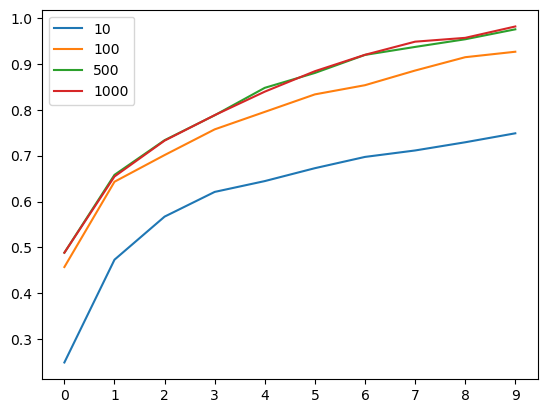

In [68]:
for size, hist in scores.items():
    plt.plot(hist['accuracy'], label=size)
    
plt.xticks(np.arange(10))
plt.legend()

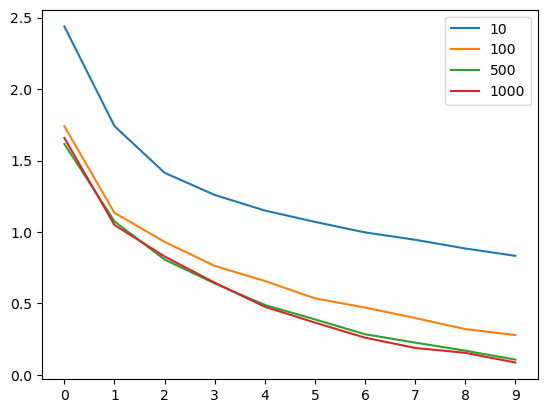

In [69]:
# plot training loss 
for size, hist in scores.items():
    plt.plot(hist['loss'], label=size)

plt.xticks(np.arange(10))
plt.legend()

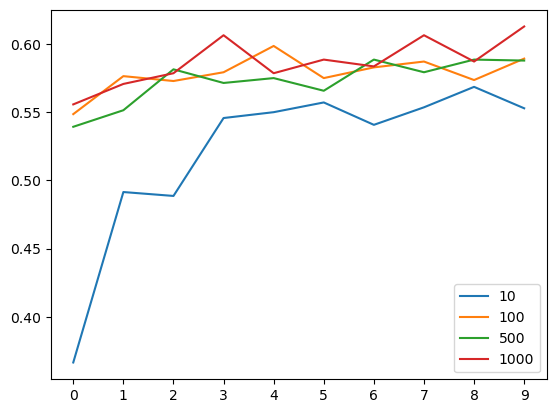

In [70]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=size)
    
plt.xticks(np.arange(10))
plt.legend()

In [71]:
scores[100]['val_accuracy']

[0.5485714077949524,
 0.5764285922050476,
 0.572857141494751,
 0.579285740852356,
 0.5985714197158813,
 0.574999988079071,
 0.5828571319580078,
 0.5871428847312927,
 0.5735714435577393,
 0.5892857313156128]

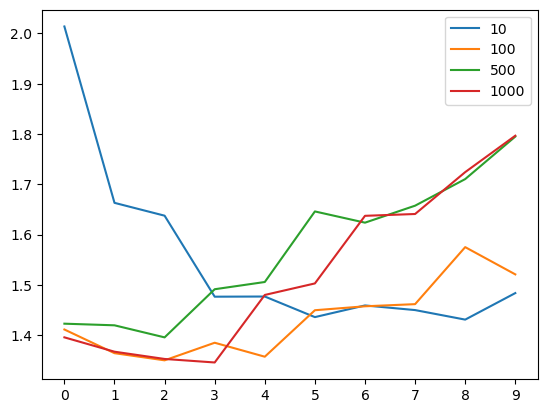

In [72]:
# plot training loss 
for size, hist in scores.items():
    plt.plot(hist['val_loss'], label=size)

plt.xticks(np.arange(10))
plt.legend()

In [73]:
best_size = 1000
print(f"Best size for additional layer: {best_size}")

Best size for additional layer: 1000


***Iteration 4: Dropout and regularisation***

In [74]:
def make_model(learning_rate, size_inner, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    # define model architecture
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(20)(drop)
    model = keras.Model(inputs, outputs)
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [75]:
learning_rate = 0.001
size_inner = 1000

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)
    
    model = make_model(
        learning_rate=learning_rate, 
        size_inner=size,
        droprate=droprate
    )
    
    history = model.fit(
        train_ds, 
        epochs=30, 
        validation_data=val_ds 
#        callbacks=[checkpoint]
    )
    scores[droprate] = history.history
    
    print()
    print()

0.0
Epoch 1/30
132/132 [==============================] - 37s 264ms/step - loss: 1.6883 - accuracy: 0.4740 - val_loss: 1.4523 - val_accuracy: 0.5414
Epoch 2/30
132/132 [==============================] - 34s 259ms/step - loss: 1.0665 - accuracy: 0.6448 - val_loss: 1.3800 - val_accuracy: 0.5743
Epoch 3/30
132/132 [==============================] - 34s 258ms/step - loss: 0.8393 - accuracy: 0.7302 - val_loss: 1.4094 - val_accuracy: 0.5643
Epoch 4/30
132/132 [==============================] - 34s 259ms/step - loss: 0.6199 - accuracy: 0.7995 - val_loss: 1.4450 - val_accuracy: 0.5750
Epoch 5/30
132/132 [==============================] - 34s 258ms/step - loss: 0.4579 - accuracy: 0.8531 - val_loss: 1.5319 - val_accuracy: 0.5764
Epoch 6/30
132/132 [==============================] - 34s 259ms/step - loss: 0.3444 - accuracy: 0.8886 - val_loss: 1.5174 - val_accuracy: 0.5971
Epoch 7/30
132/132 [==============================] - 34s 259ms/step - loss: 0.2559 - accuracy: 0.9238 - val_loss: 1.6213 - va

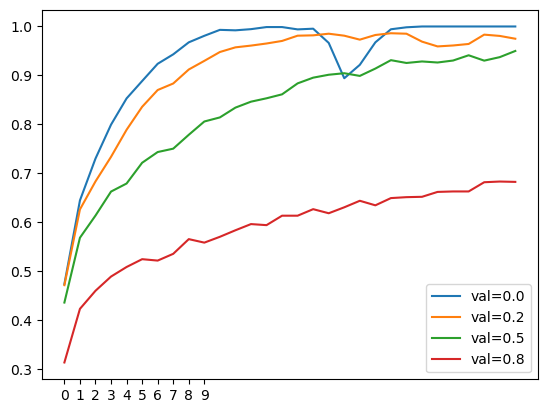

In [76]:
for droprate, hist in scores.items():
    plt.plot(hist['accuracy'], label='val=%s' % droprate)
    
plt.xticks(np.arange(10))
plt.legend()

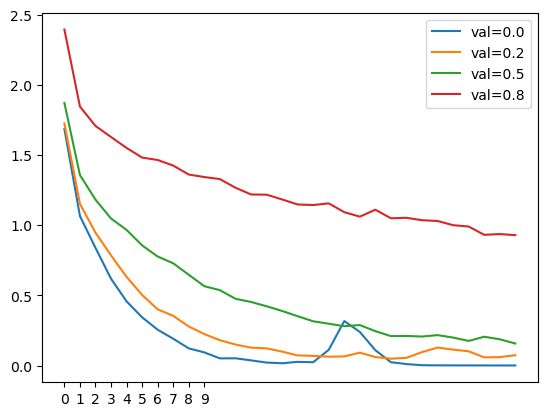

In [77]:
# plot training loss 
for droprate, hist in scores.items():
    plt.plot(hist['loss'], label='val=%s' % droprate)

plt.xticks(np.arange(10))
plt.legend()

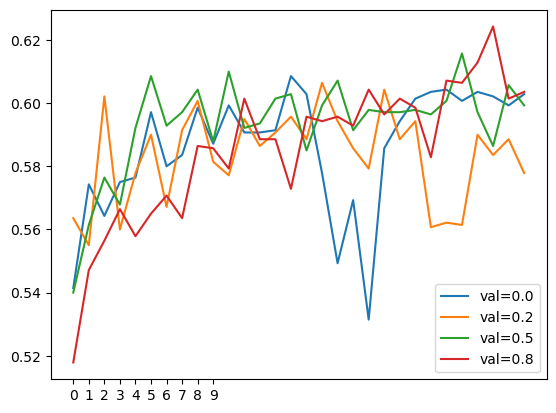

In [78]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label='val=%s' % droprate)
    
plt.xticks(np.arange(10))
plt.legend()

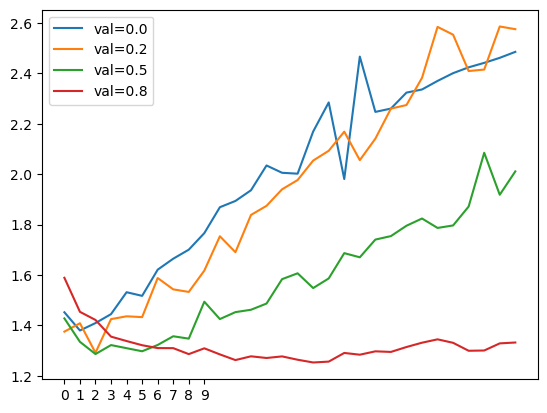

In [79]:
# plot training loss 
for droprate, hist in scores.items():
    plt.plot(hist['val_loss'], label='val=%s' % droprate)

plt.xticks(np.arange(10))
plt.legend()

***Iteration 5: Use larger image size***

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# run model using train data
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)
train_ds = train_gen.flow_from_directory(
    './data/train/',
    target_size=(299, 299),
    batch_size=32
)

Found 4200 images belonging to 20 classes.


In [10]:
# run model using validation data
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './data/validation/',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 1400 images belonging to 20 classes.


In [11]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    # define model architecture
    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(20)(drop)
    
    model = keras.Model(inputs, outputs)
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [12]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v5_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)   

In [14]:
input_size = 299
learning_rate = 0.001
size_inner = 1000
droprate = 0.8
epochs = 50

scores = {}

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate, 
    size_inner=size_inner,
    droprate=droprate
)
    
history = model.fit(
    train_ds, 
    epochs=epochs, 
    validation_data=val_ds
#    callbacks=[checkpoint]
)

scores = history.history

Epoch 1/50
132/132 [==============================] - 110s 817ms/step - loss: 1.9910 - accuracy: 0.3962 - val_loss: 1.2954 - val_accuracy: 0.5986
Epoch 2/50
132/132 [==============================] - 103s 781ms/step - loss: 1.4590 - accuracy: 0.5369 - val_loss: 1.1186 - val_accuracy: 0.6471
Epoch 3/50
132/132 [==============================] - 103s 779ms/step - loss: 1.3237 - accuracy: 0.5645 - val_loss: 1.0666 - val_accuracy: 0.6586
Epoch 4/50
132/132 [==============================] - 103s 780ms/step - loss: 1.2397 - accuracy: 0.5948 - val_loss: 1.0376 - val_accuracy: 0.6643
Epoch 5/50
132/132 [==============================] - 103s 779ms/step - loss: 1.1902 - accuracy: 0.6040 - val_loss: 0.9880 - val_accuracy: 0.6779
Epoch 6/50
132/132 [==============================] - 103s 780ms/step - loss: 1.1435 - accuracy: 0.6240 - val_loss: 0.9586 - val_accuracy: 0.6829
Epoch 7/50
132/132 [==============================] - 103s 778ms/step - loss: 1.0723 - accuracy: 0.6379 - val_loss: 0.9456 -

Text(0.5, 1.0, 'Accuracy')

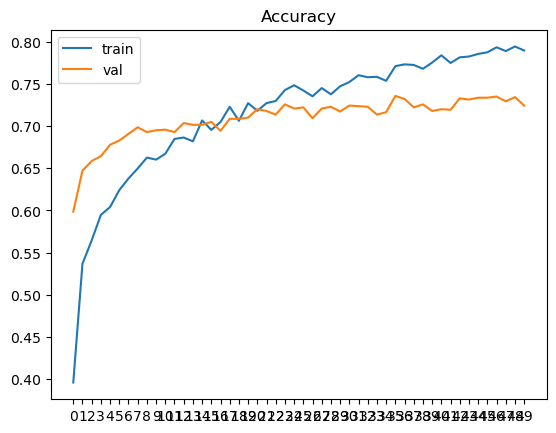

In [15]:
# plot training accuracy vs validation accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')

plt.xticks(np.arange(epochs))
plt.legend()
plt.title('Accuracy')

Text(0.5, 1.0, 'Loss')

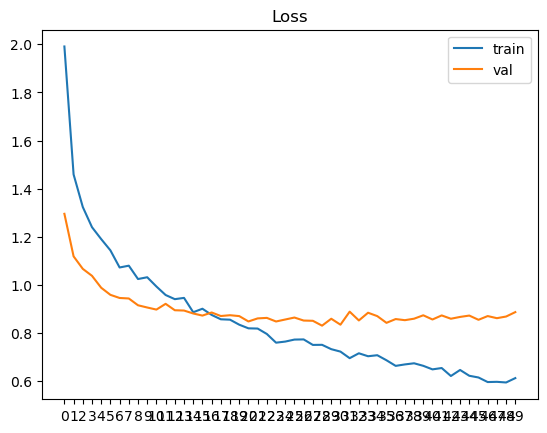

In [16]:
# plot training loss vs validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

plt.xticks(np.arange(epochs))
plt.legend()
plt.title('Loss')

# Save model as TF-Lite model

In [54]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [55]:
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpte6egnhs/assets


INFO:tensorflow:Assets written to: /tmp/tmpte6egnhs/assets
2024-01-20 00:14:20.648534: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2024-01-20 00:14:20.648576: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2024-01-20 00:14:20.649355: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpte6egnhs
2024-01-20 00:14:20.676752: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2024-01-20 00:14:20.676783: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /tmp/tmpte6egnhs
2024-01-20 00:14:20.765879: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2024-01-20 00:14:20.791600: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2024-01-20 00:14:21.327868: I tensorflow/cc/saved_model/loader.cc:212] Running initializatio

In [56]:
with open('catbreeds-model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

In [61]:
!pip install tflite-runtime --no-deps

In [63]:
import tensorflow.lite as tflite
# import tflite_runtime.interpreter as tflite

In [64]:
interpreter = tflite.Interpreter(model_path='catbreeds-model.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [65]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [66]:
classes = ['Abyssinian', 
 'American Bobtail', 
 'American Curl',
 'American Shorthair',
 'Bengal',
 'Birman',
 'Bombay',
 'British Shorthair',
 'Egyptian Mau',
 'Exotic Shorthair',
 'Maine Coon',
 'Manx',
 'Norwegian Forest',
 'Persian',
 'Ragdoll',
 'Russian Blue',
 'Scottish Fold',
 'Siamese',
 'Sphynx',
 'Turkish Angora']

dict(zip(classes, np.round(pred[0], 4)))

{'Abyssinian': 4.6729,
 'American Bobtail': -0.8745,
 'American Curl': -2.2204,
 'American Shorthair': -0.0965,
 'Bengal': -2.4093,
 'Birman': -7.8355,
 'Bombay': -3.1772,
 'British Shorthair': -0.4376,
 'Egyptian Mau': -1.8827,
 'Exotic Shorthair': -5.8729,
 'Maine Coon': -4.2017,
 'Manx': -0.9159,
 'Norwegian Forest': -7.4404,
 'Persian': -9.9842,
 'Ragdoll': -6.6235,
 'Russian Blue': 2.9943,
 'Scottish Fold': -4.5351,
 'Siamese': -2.7456,
 'Sphynx': -1.0087,
 'Turkish Angora': -3.9668}

***Remove TF dependency***

In [123]:
from PIL import Image

In [124]:
with Image.open(fullname) as img:
    img = img.resize((150, 150), Image.NEAREST)

/tmp/ipykernel_175/3100428567.py:2: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = img.resize((150, 150), Image.NEAREST)


In [125]:
def preprocess_input(x):
    x /= 127.5
    x -= 1.
    return x

In [126]:
x = np.array(img, dtype='float32')
X = np.array([x])

X = preprocess_input(X)

In [127]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [128]:
classes = ['Abyssinian', 
 'American Bobtail', 
 'American Curl',
 'American Shorthair',
 'Bengal',
 'Birman',
 'Bombay',
 'British Shorthair',
 'Egyptian Mau',
 'Exotic Shorthair',
 'Maine Coon',
 'Manx',
 'Norwegian Forest',
 'Persian',
 'Ragdoll',
 'Russian Blue',
 'Scottish Fold',
 'Siamese',
 'Sphynx',
 'Turkish Angora']

dict(zip(classes, np.round(pred[0], 4)))

{'Abyssinian': 4.6759,
 'American Bobtail': 1.1253,
 'American Curl': -3.1512,
 'American Shorthair': 0.8102,
 'Bengal': 0.2191,
 'Birman': -8.0524,
 'Bombay': -2.8931,
 'British Shorthair': 1.2196,
 'Egyptian Mau': -0.209,
 'Exotic Shorthair': -3.0235,
 'Maine Coon': -0.7267,
 'Manx': -1.2052,
 'Norwegian Forest': -5.7445,
 'Persian': -8.993,
 'Ragdoll': -5.5372,
 'Russian Blue': 1.9619,
 'Scottish Fold': -5.4522,
 'Siamese': -4.2942,
 'Sphynx': -1.0609,
 'Turkish Angora': -4.2024}

## Evaluate

# Communicate the Results

In [97]:
print('fin')

fin
